<a href="https://colab.research.google.com/github/amandascholze/Data_Sci/blob/main/Scholze_lab_6_Linear_Fit_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://setosa.io/ev/ordinary-least-squares-regression/

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import urllib.request

In [3]:
#normal 2 imports plus 2 new ones

In [5]:
url = "https://raw.githubusercontent.com/amandascholze/Data_Sci/main/cereal_data.csv"

In [7]:
urllib.request.urlretrieve(url,'cereal_data.csv')

('cereal_data.csv', <http.client.HTTPMessage at 0x7fcd51249ad0>)

In [8]:
cereal_data = pd.read_csv('cereal_data.csv')  

In [9]:
cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [10]:
cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [11]:
cereal_data["sugars"]

0      6
1      8
2      5
3      0
4      8
      ..
72     3
73    12
74     3
75     3
76     8
Name: sugars, Length: 77, dtype: int64

In [12]:
#gives amount of sugars in each row

In [13]:
cereal_data[["calories", "sugars"]]

,calories,sugars
0,70,6
1,120,8
2,70,5
3,50,0
4,110,8
...,...,...
72,110,3
73,110,12
74,100,3
75,100,3


In [14]:
cereal_data["sugars"].mean()

6.922077922077922

In [15]:
#mean of sugars from all companies

In [16]:
cereal_data[["calories", "sugars"]].mean()

calories    106.883117
sugars        6.922078
dtype: float64

In [17]:
#mean of cals. and sugars

In [18]:
cereal_data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [19]:
#count = amount of cereals, gives us all the average data

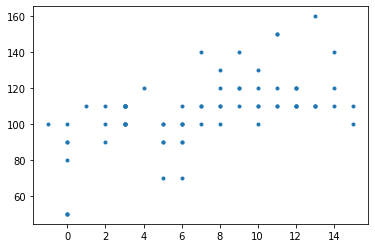

In [25]:
plt.plot(cereal_data[["sugars"]],cereal_data[["calories"]],'.')

In [21]:
#sugar vs cals

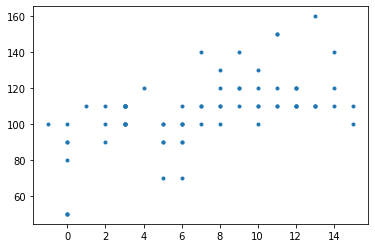

In [28]:
x = cereal_data[["sugars"]]
y = cereal_data[["calories"]]

plt.plot(x,y,'.')

In [29]:
#same as above j dif way to write

Text(0.5, 1.0, 'Sugars vs Calories')

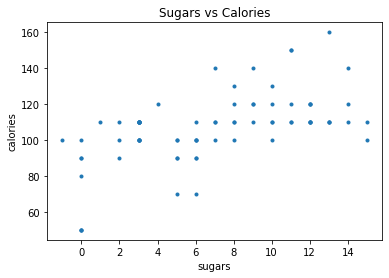

In [30]:
x = cereal_data[["sugars"]]
y = cereal_data[["calories"]]

plt.plot(x,y,'.')
plt.xlabel("sugars")
plt.ylabel("calories")
plt.title("Sugars vs Calories")

In [31]:
#add labels

Text(0.5, 1.0, 'Fat vs Calories')

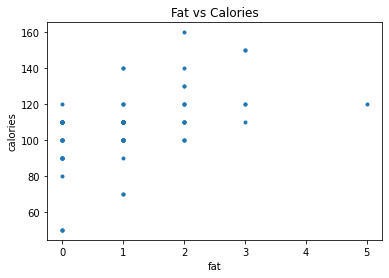

In [32]:
x = cereal_data[["fat"]]
y = cereal_data[["calories"]]

plt.plot(x,y,'.')
plt.xlabel("fat")
plt.ylabel("calories")
plt.title("Fat vs Calories")

In [33]:
#changes sugar to fat

Text(0.5, 1.0, 'Protein vs weight')

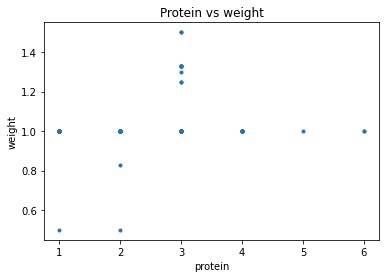

In [34]:
x = cereal_data[["protein"]]
y = cereal_data[["weight"]]

plt.plot(x,y,'.')
plt.xlabel("protein")
plt.ylabel("weight")
plt.title("Protein vs weight")

In [38]:
X = cereal_data[["protein"]]
Y = cereal_data[["weight"]]

In [39]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression() 

In [40]:
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

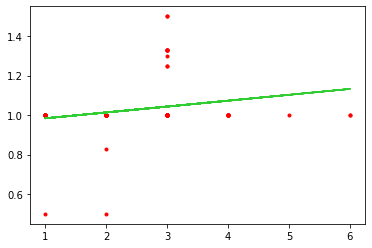

In [46]:
plt.plot(X, Y,'r.')
plt.plot(X, Y_pred, color='limegreen')
plt.show()

In [47]:
x = np.linspace(0,10,50)

In [48]:
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [49]:
#prints out the numbrs from 01-10

In [101]:
m = 3
b = 7

y = m*x + b

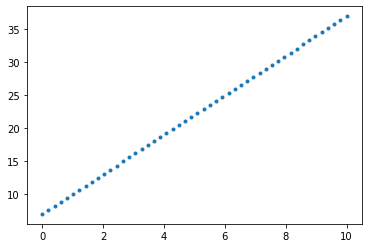

In [102]:
plt.plot(x,y,'.')

In [103]:
noise = 10 * np.random.randn(50,) # 50 points bc 50 up there

In [104]:
y = 3 * x + 7 + noise #noise= random numbers

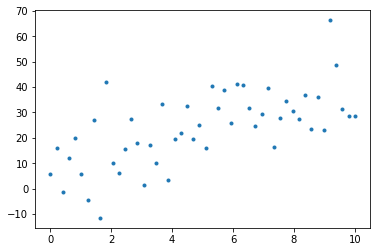

In [105]:
plt.plot(x,y,'.')

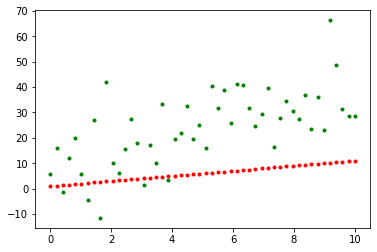

In [106]:
m_guess = 1
b_guess = 1

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'r.');
plt.plot(x,y,'g.');

In [107]:
#not a good guess

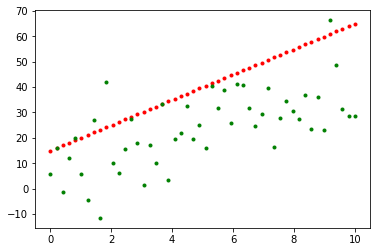

In [108]:
m_guess = 5
b_guess = 15

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'r.');
plt.plot(x,y,'g.');

In [109]:
#still not good

In [110]:
loss = np.sum((y_guess - y)**2)

In [111]:
loss

20651.714475964905

In [112]:
#big number = way off

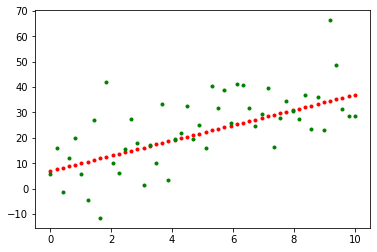

In [113]:
m_guess = 3
b_guess = 7

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'r.');
plt.plot(x,y,'g.');

In [114]:
for m_guess in np.linspace(-10,10,10):
  print(m_guess)

-10.0
-7.777777777777778
-5.555555555555555
-3.333333333333333
-1.1111111111111107
1.1111111111111107
3.333333333333334
5.555555555555557
7.777777777777779
10.0


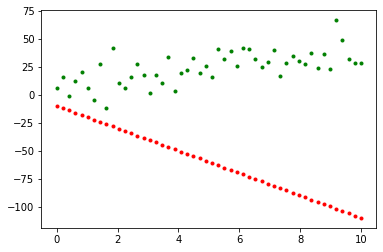

433018.03306676616 -10.0 -10.0


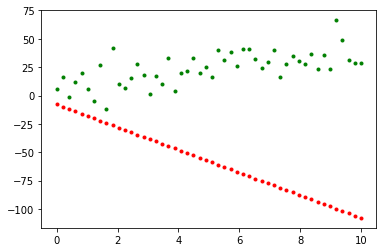

414627.5888086877 -10.0 -7.777777777777778


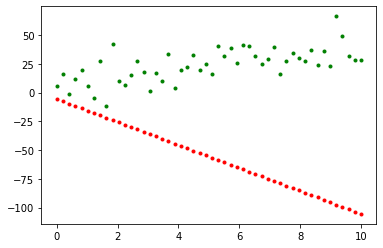

396730.971711103 -10.0 -5.555555555555555


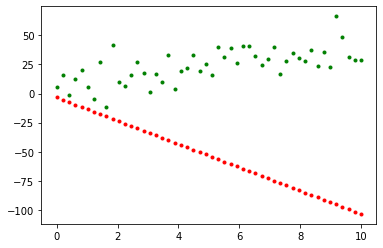

379328.18177401216 -10.0 -3.333333333333333


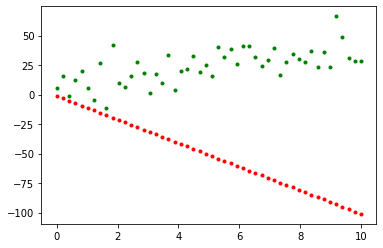

362419.2189974152 -10.0 -1.1111111111111107


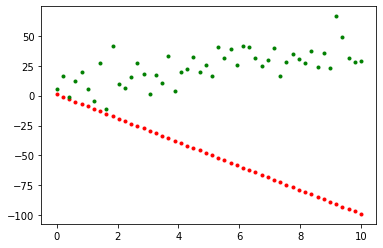

346004.083381312 -10.0 1.1111111111111107


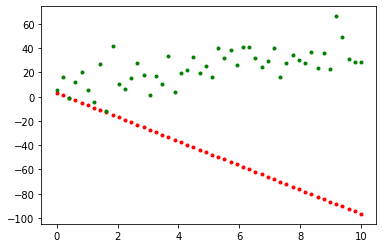

330082.7749257028 -10.0 3.333333333333334


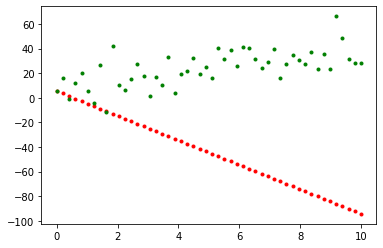

314655.2936305872 -10.0 5.555555555555557


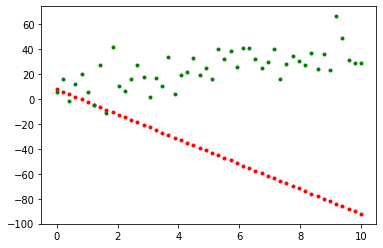

299721.63949596556 -10.0 7.777777777777779


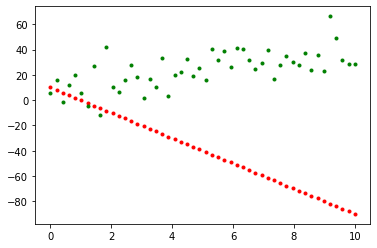

285281.8125218377 -10.0 10.0


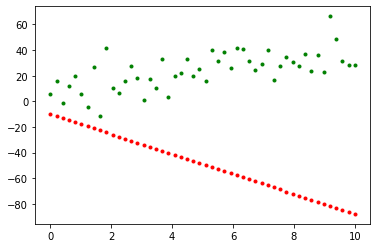

322773.5701716115 -7.777777777777778 -10.0


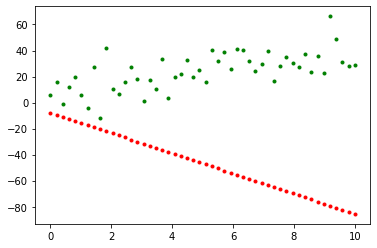

306852.2617160021 -7.777777777777778 -7.777777777777778


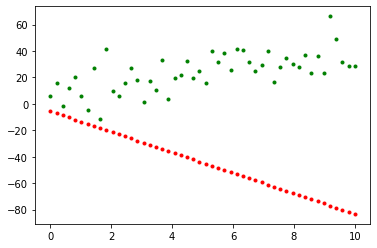

291424.78042088664 -7.777777777777778 -5.555555555555555


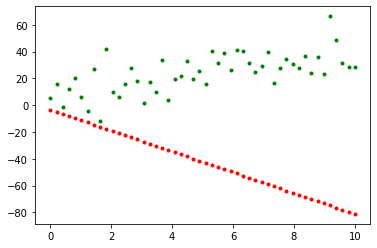

276491.126286265 -7.777777777777778 -3.333333333333333


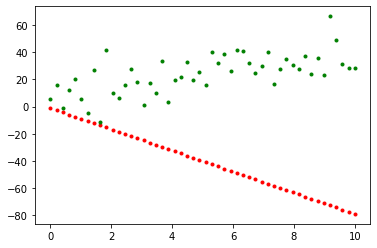

262051.29931213713 -7.777777777777778 -1.1111111111111107


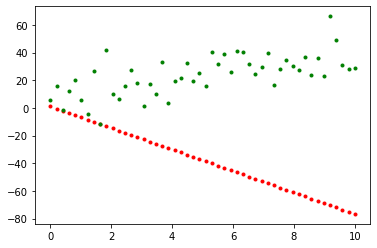

248105.2994985031 -7.777777777777778 1.1111111111111107


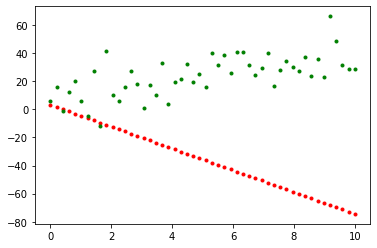

234653.1268453629 -7.777777777777778 3.333333333333334


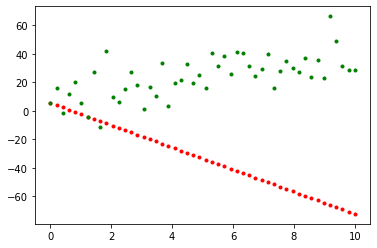

221694.7813527165 -7.777777777777778 5.555555555555557


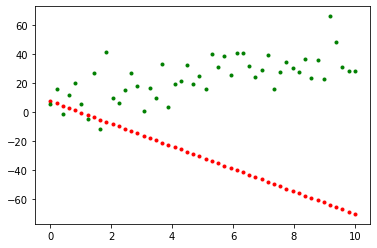

209230.26302056396 -7.777777777777778 7.777777777777779


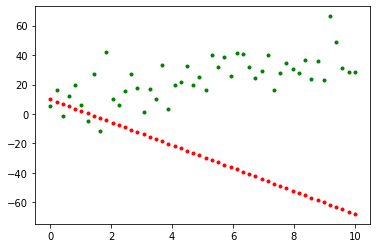

197259.57184890527 -7.777777777777778 10.0


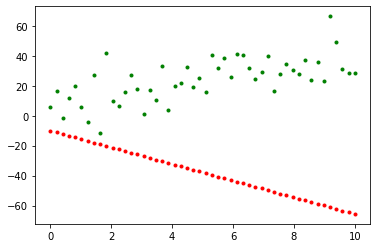

229157.9810481878 -5.555555555555555 -10.0


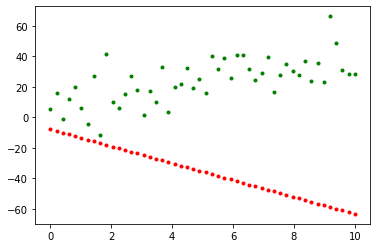

215705.80839504758 -5.555555555555555 -7.777777777777778


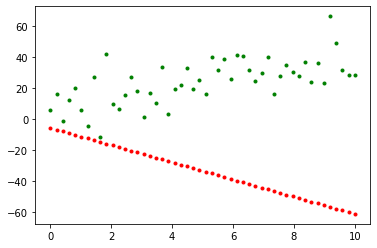

202747.46290240122 -5.555555555555555 -5.555555555555555


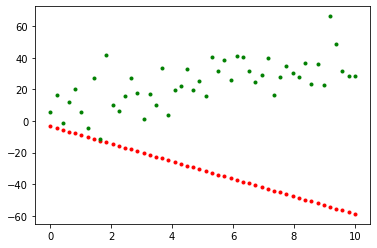

190282.94457024868 -5.555555555555555 -3.333333333333333


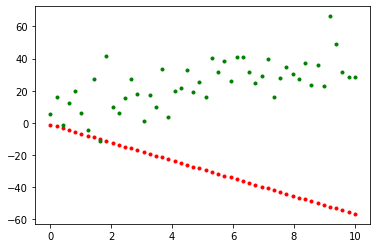

178312.25339858996 -5.555555555555555 -1.1111111111111107


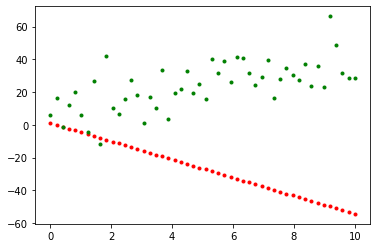

166835.38938742506 -5.555555555555555 1.1111111111111107


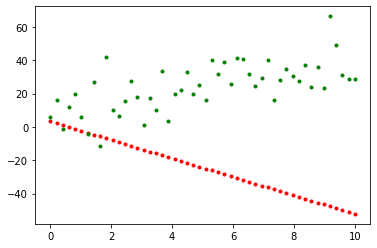

155852.352536754 -5.555555555555555 3.333333333333334


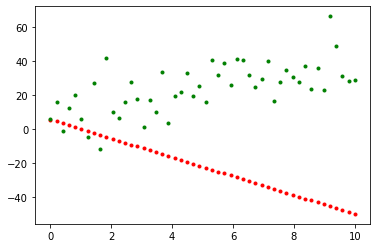

145363.14284657675 -5.555555555555555 5.555555555555557


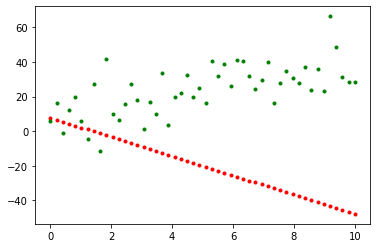

135367.76031689334 -5.555555555555555 7.777777777777779


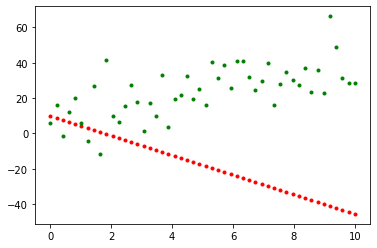

125866.20494770375 -5.555555555555555 10.0


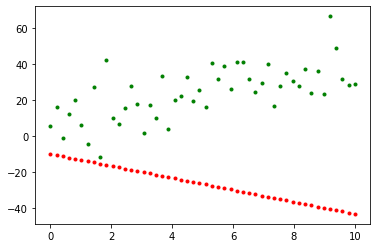

152171.26569649501 -3.333333333333333 -10.0


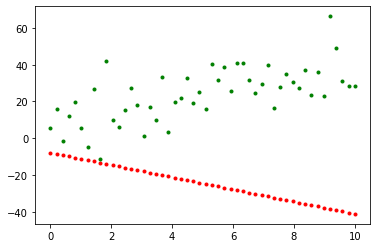

141188.22884582393 -3.333333333333333 -7.777777777777778


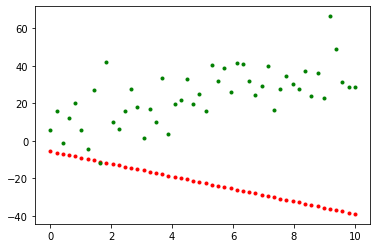

130699.01915564669 -3.333333333333333 -5.555555555555555


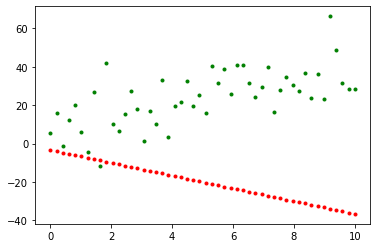

120703.63662596329 -3.333333333333333 -3.333333333333333


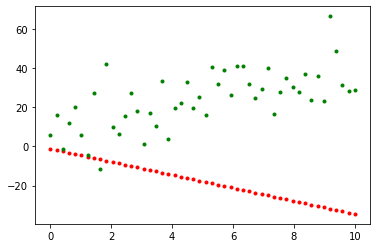

111202.08125677372 -3.333333333333333 -1.1111111111111107


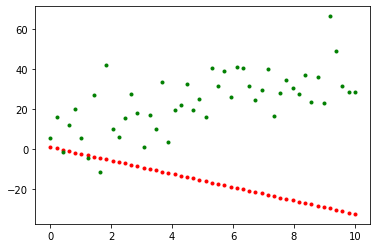

102194.35304807794 -3.333333333333333 1.1111111111111107


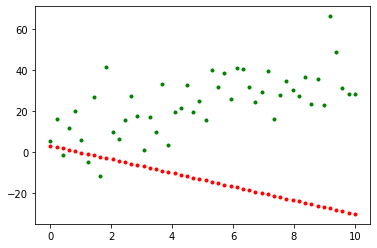

93680.45199987601 -3.333333333333333 3.333333333333334


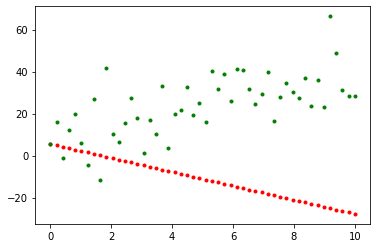

85660.37811216792 -3.333333333333333 5.555555555555557


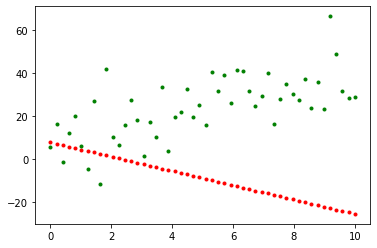

78134.13138495364 -3.333333333333333 7.777777777777779


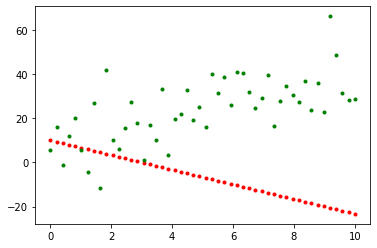

71101.7118182332 -3.333333333333333 10.0


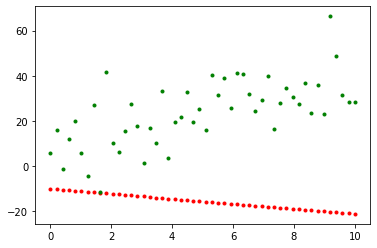

91813.4241165331 -1.1111111111111107 -10.0


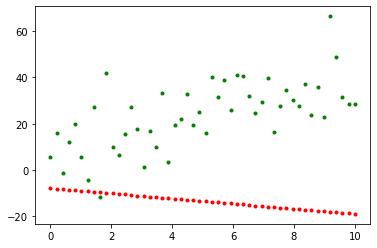

83299.52306833118 -1.1111111111111107 -7.777777777777778


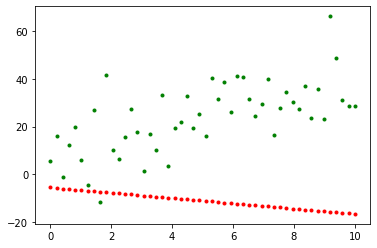

75279.44918062308 -1.1111111111111107 -5.555555555555555


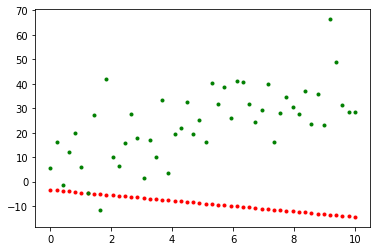

67753.20245340881 -1.1111111111111107 -3.333333333333333


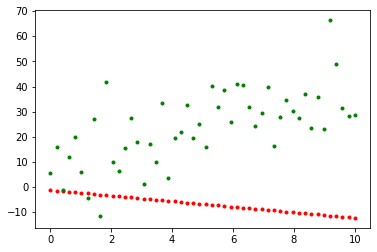

60720.78288668837 -1.1111111111111107 -1.1111111111111107


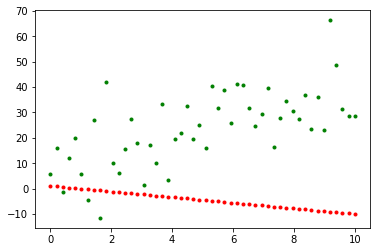

54182.19048046175 -1.1111111111111107 1.1111111111111107


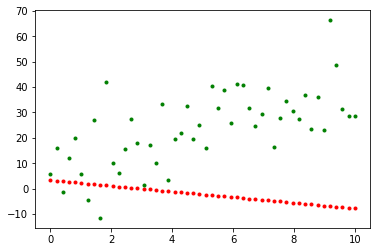

48137.42523472896 -1.1111111111111107 3.333333333333334


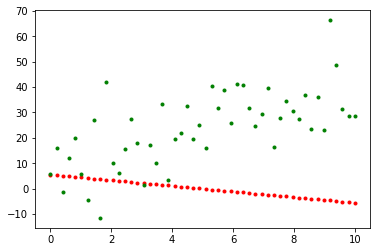

42586.487149489985 -1.1111111111111107 5.555555555555557


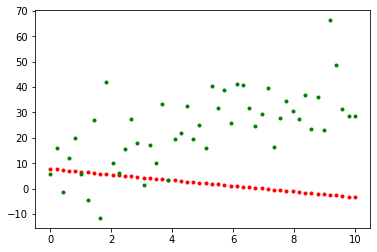

37529.37622474486 -1.1111111111111107 7.777777777777779


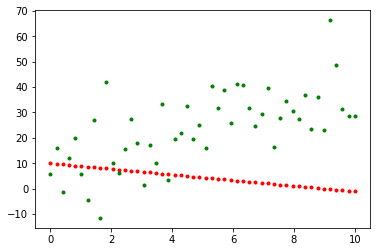

32966.09246049355 -1.1111111111111107 10.0


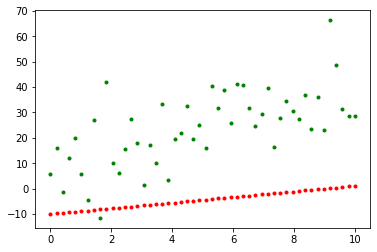

48084.456308302164 1.1111111111111107 -10.0


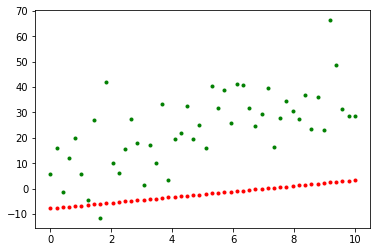

42039.69106256938 1.1111111111111107 -7.777777777777778


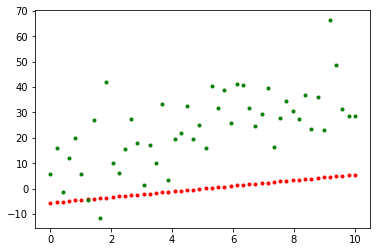

36488.752977330405 1.1111111111111107 -5.555555555555555


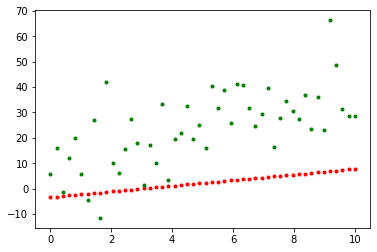

31431.642052585266 1.1111111111111107 -3.333333333333333


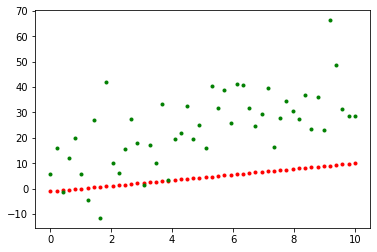

26868.358288333962 1.1111111111111107 -1.1111111111111107


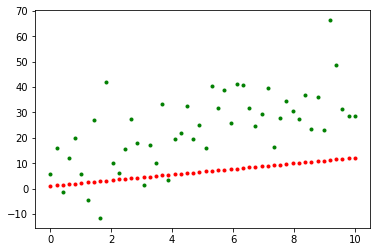

22798.901684576475 1.1111111111111107 1.1111111111111107


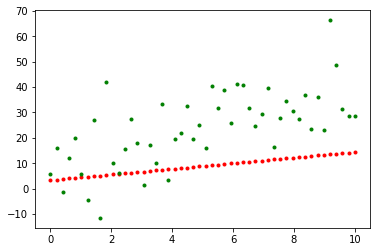

19223.272241312818 1.1111111111111107 3.333333333333334


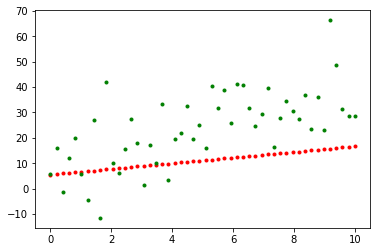

16141.469958542988 1.1111111111111107 5.555555555555557


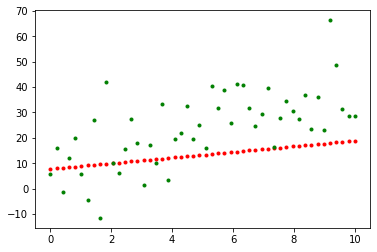

13553.494836266986 1.1111111111111107 7.777777777777779


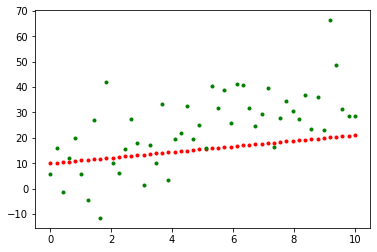

11459.346874484809 1.1111111111111107 10.0


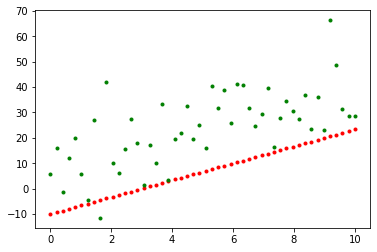

20984.362271802103 3.333333333333334 -10.0


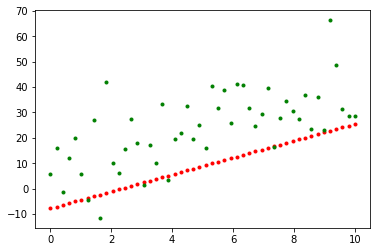

17408.732828538454 3.333333333333334 -7.777777777777778


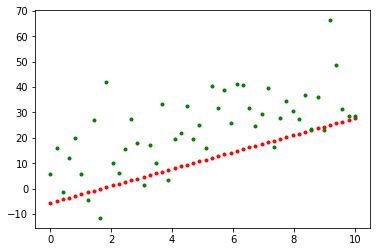

14326.930545768624 3.333333333333334 -5.555555555555555


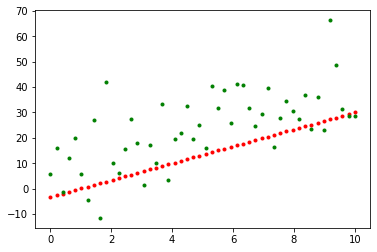

11738.95542349262 3.333333333333334 -3.333333333333333


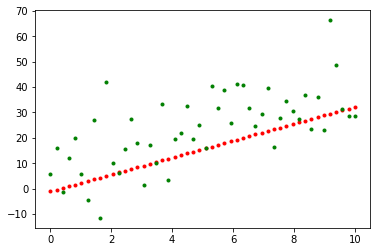

9644.807461710443 3.333333333333334 -1.1111111111111107


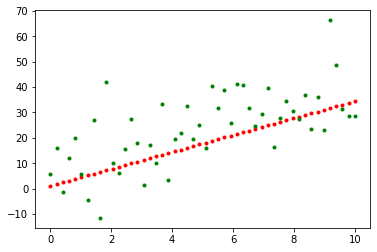

8044.486660422098 3.333333333333334 1.1111111111111107


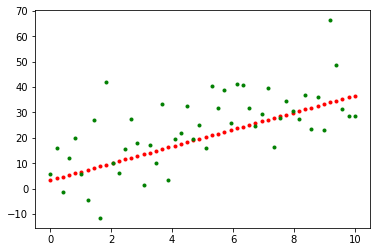

6937.993019627577 3.333333333333334 3.333333333333334


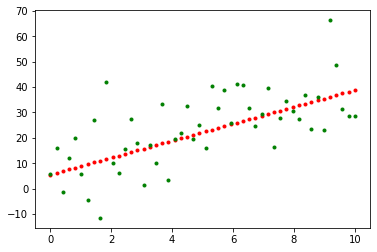

6325.326539326885 3.333333333333334 5.555555555555557


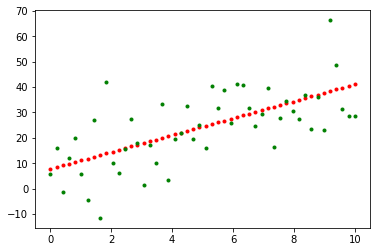

6206.48721952002 3.333333333333334 7.777777777777779


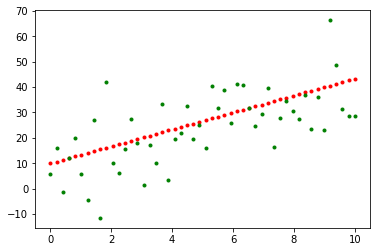

6581.475060206981 3.333333333333334 10.0


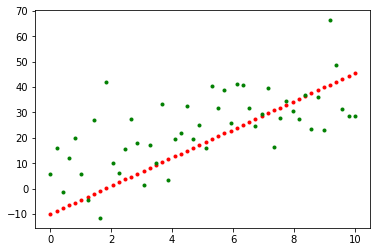

10513.142007032977 5.555555555555557 -10.0


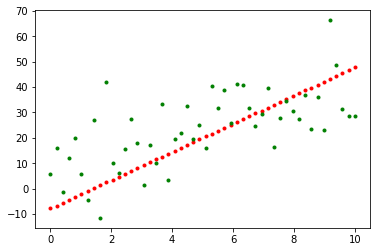

9406.64836623846 5.555555555555557 -7.777777777777778


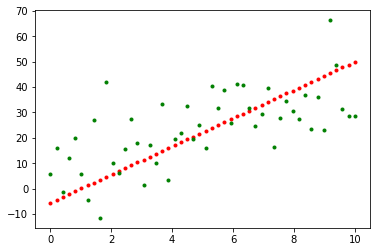

8793.981885937766 5.555555555555557 -5.555555555555555


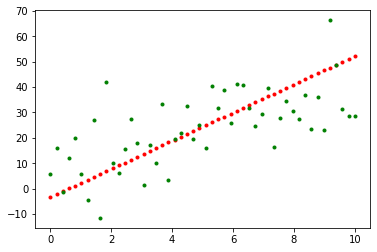

8675.1425661309 5.555555555555557 -3.333333333333333


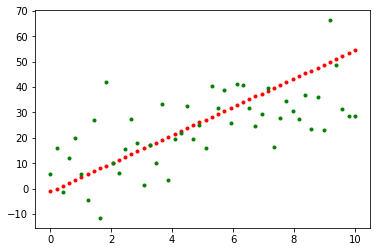

9050.130406817863 5.555555555555557 -1.1111111111111107


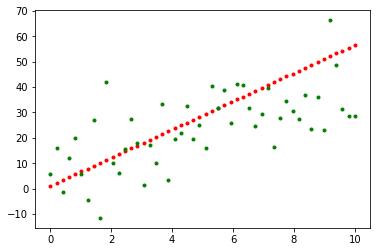

9918.945407998652 5.555555555555557 1.1111111111111107


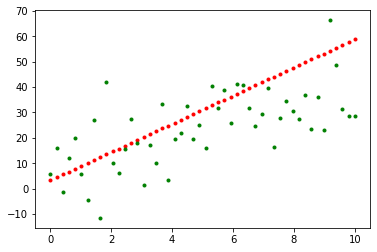

11281.587569673271 5.555555555555557 3.333333333333334


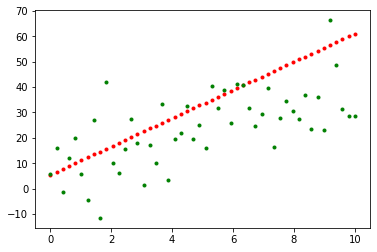

13138.056891841716 5.555555555555557 5.555555555555557


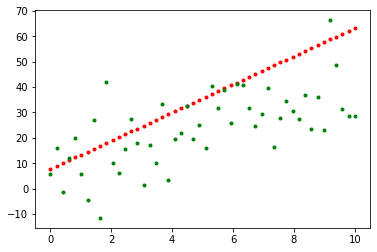

15488.353374503984 5.555555555555557 7.777777777777779


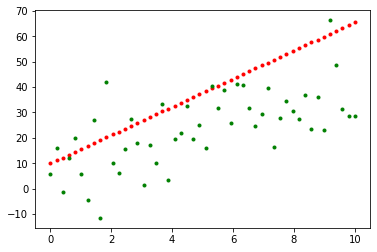

18332.47701766008 5.555555555555557 10.0


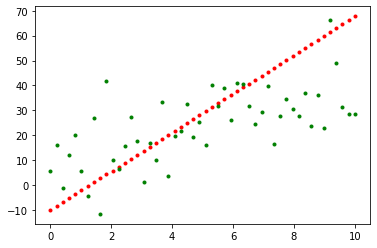

16670.795513994763 7.777777777777779 -10.0


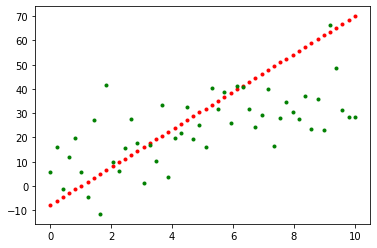

18033.437675669382 7.777777777777779 -7.777777777777778


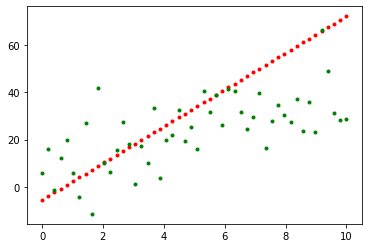

19889.906997837825 7.777777777777779 -5.555555555555555


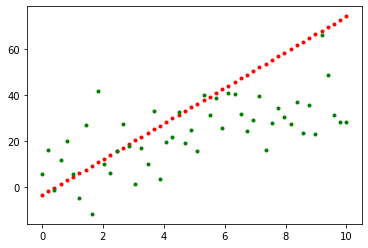

22240.203480500095 7.777777777777779 -3.333333333333333


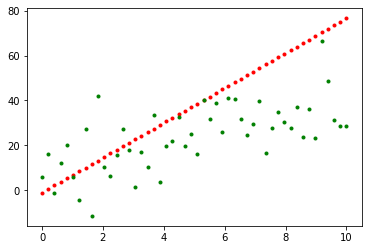

25084.32712365619 7.777777777777779 -1.1111111111111107


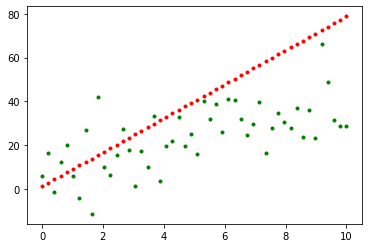

28422.277927306117 7.777777777777779 1.1111111111111107


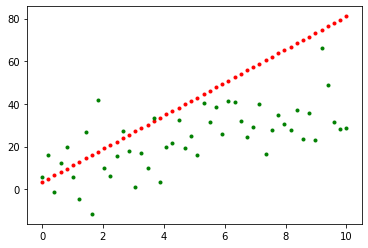

32254.05589144987 7.777777777777779 3.333333333333334


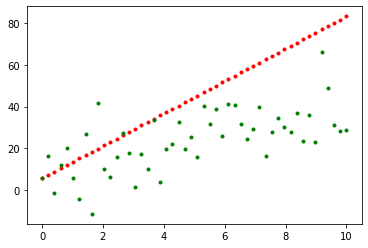

36579.66101608744 7.777777777777779 5.555555555555557


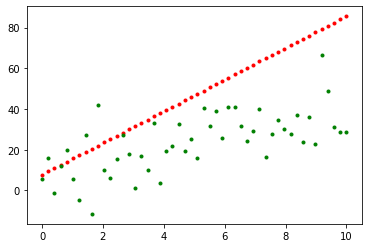

41399.093301218854 7.777777777777779 7.777777777777779


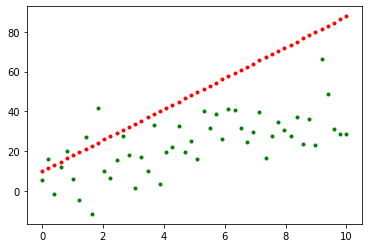

46712.35274684407 7.777777777777779 10.0


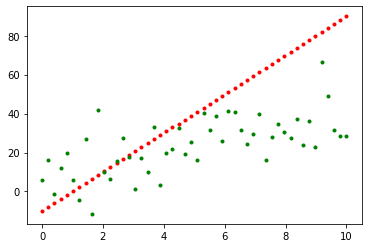

39457.32279268746 10.0 -10.0


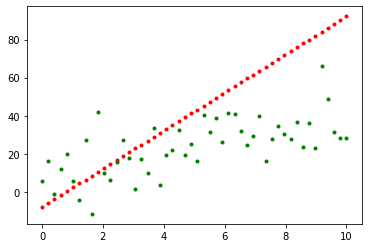

43289.10075683121 10.0 -7.777777777777778


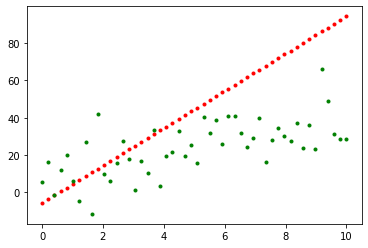

47614.705881468784 10.0 -5.555555555555555


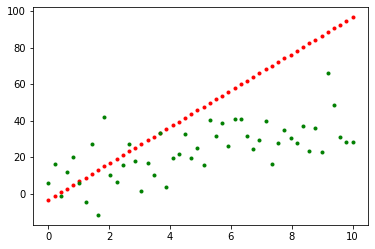

52434.1381666002 10.0 -3.333333333333333


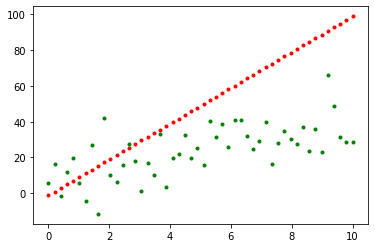

57747.39761222541 10.0 -1.1111111111111107


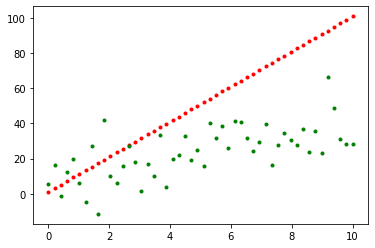

63554.484218344485 10.0 1.1111111111111107


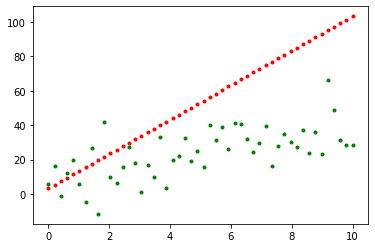

69855.39798495737 10.0 3.333333333333334


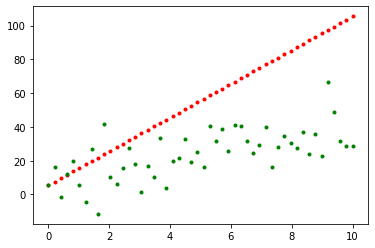

76650.1389120641 10.0 5.555555555555557


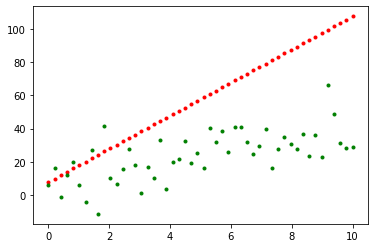

83938.70699966462 10.0 7.777777777777779


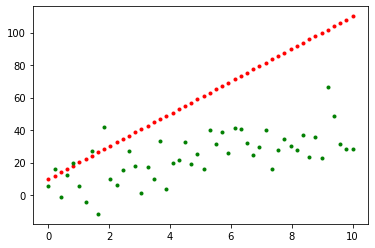

91721.10224775899 10.0 10.0


In [115]:
for m_guess in np.linspace(-10,10,10):
    for b_guess in np.linspace(-10,10,10):
        
        y_guess = m_guess * x + b_guess

        plt.plot(x,y_guess,'r.');
        plt.plot(x,y,'g.');
        plt.show()

        loss = np.sum((y_guess - y)**2)

        print(loss,m_guess,b_guess)

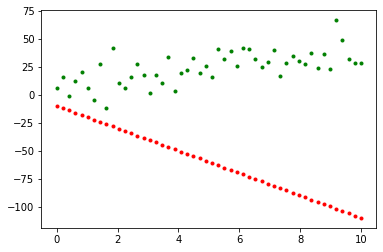

433018.03306676616 -10.0 -10.0


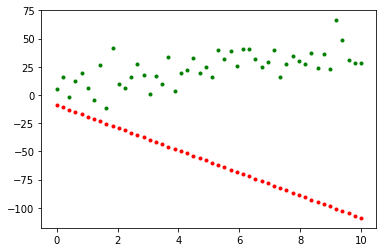

424245.21259487234 -10.0 -8.947368421052632


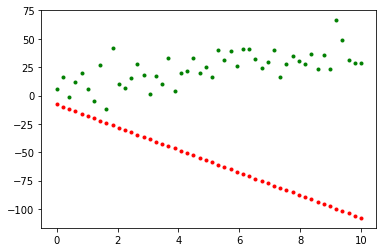

415583.19544707844 -10.0 -7.894736842105264


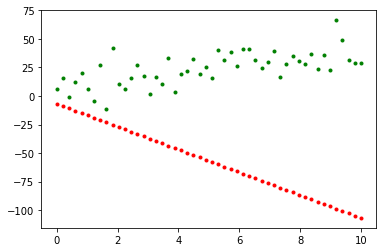

407031.9816233841 -10.0 -6.842105263157895


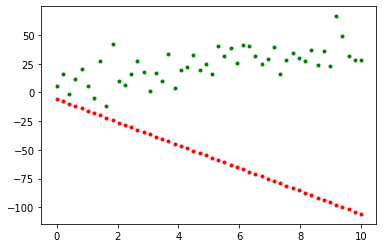

398591.57112378953 -10.0 -5.7894736842105265


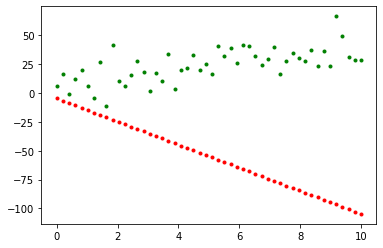

390261.9639482947 -10.0 -4.736842105263158


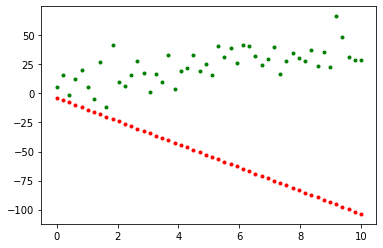

382043.16009689955 -10.0 -3.6842105263157894


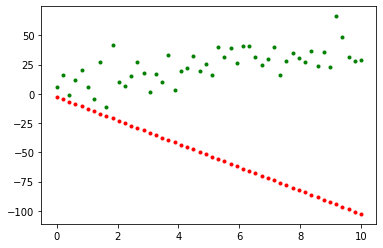

373935.1595696042 -10.0 -2.6315789473684212


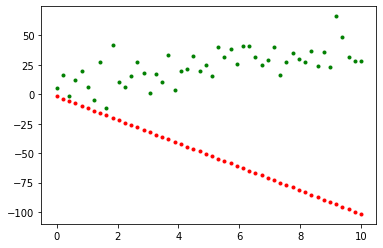

365937.9623664085 -10.0 -1.578947368421053


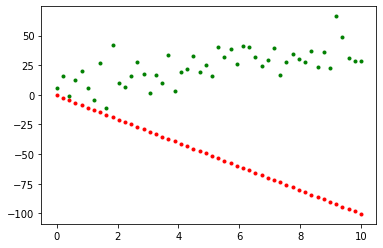

358051.5684873125 -10.0 -0.526315789473685


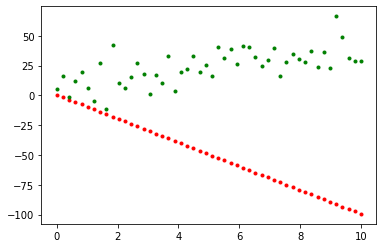

350275.9779323162 -10.0 0.5263157894736832


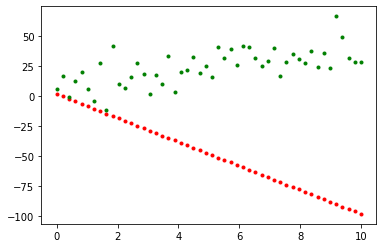

342611.1907014197 -10.0 1.5789473684210513


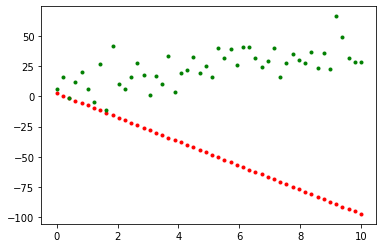

335057.206794623 -10.0 2.6315789473684212


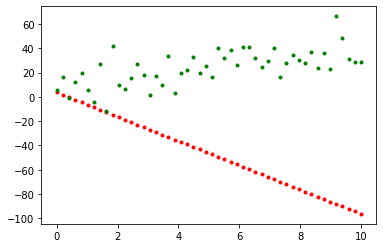

327614.0262119259 -10.0 3.6842105263157894


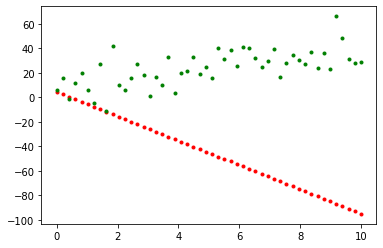

320281.6489533286 -10.0 4.7368421052631575


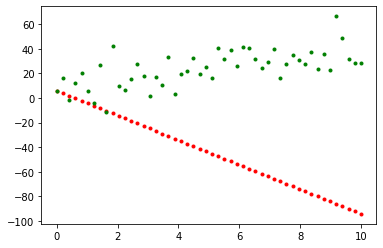

313060.07501883095 -10.0 5.789473684210526


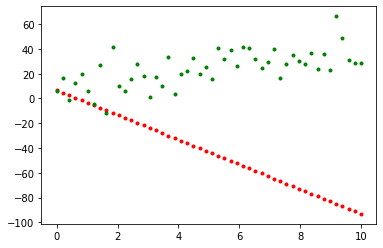

305949.3044084331 -10.0 6.842105263157894


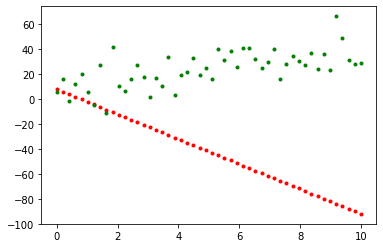

298949.33712213486 -10.0 7.894736842105264


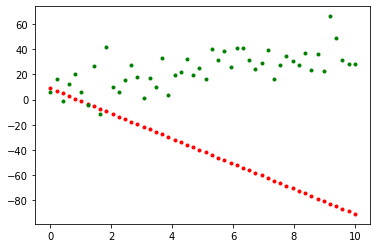

292060.1731599363 -10.0 8.94736842105263


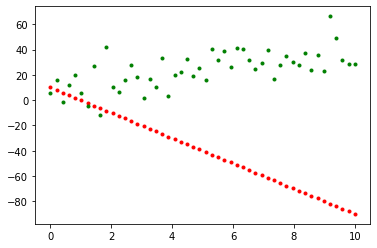

285281.8125218377 -10.0 10.0


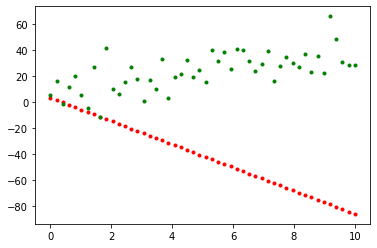

280522.32960583357 -8.947368421052632 3.6842105263157894


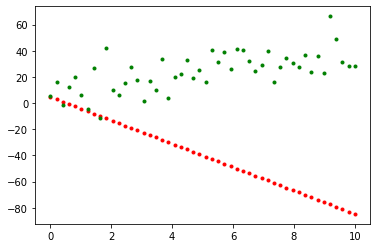

273743.96896773484 -8.947368421052632 4.7368421052631575


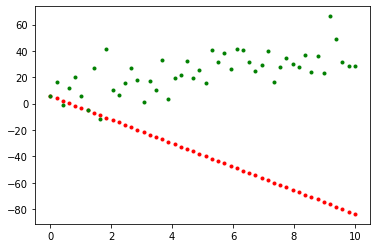

267076.4116537358 -8.947368421052632 5.789473684210526


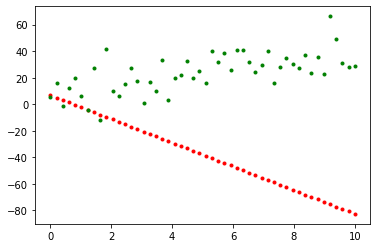

260519.65766383658 -8.947368421052632 6.842105263157894


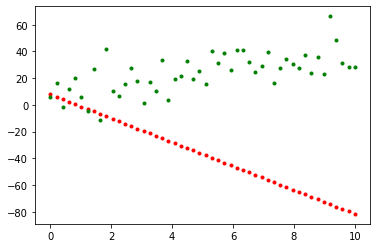

254073.706998037 -8.947368421052632 7.894736842105264


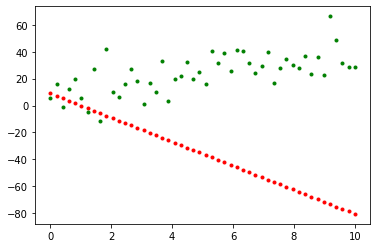

247738.55965633717 -8.947368421052632 8.94736842105263


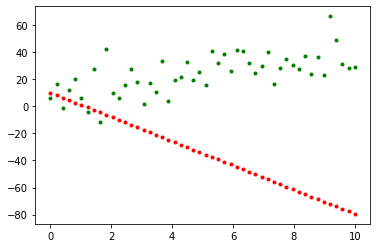

241514.21563873708 -8.947368421052632 10.0


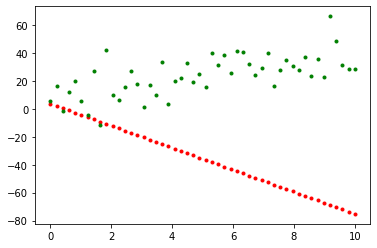

237161.76534187476 -7.894736842105264 3.6842105263157894


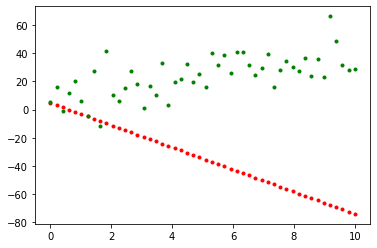

230937.42132427465 -7.894736842105264 4.7368421052631575


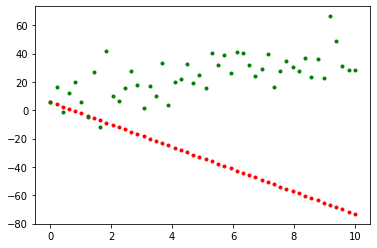

224823.88063077428 -7.894736842105264 5.789473684210526


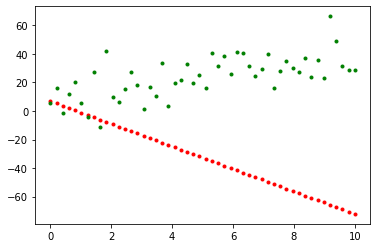

218821.14326137357 -7.894736842105264 6.842105263157894


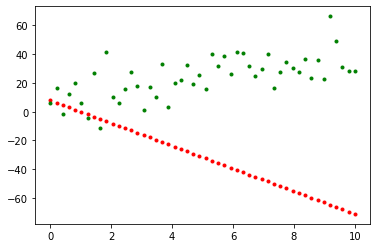

212929.20921607266 -7.894736842105264 7.894736842105264


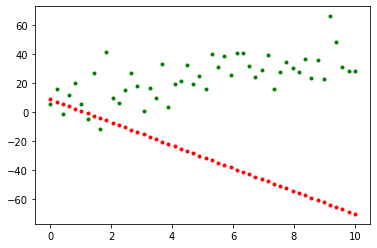

207148.07849487147 -7.894736842105264 8.94736842105263


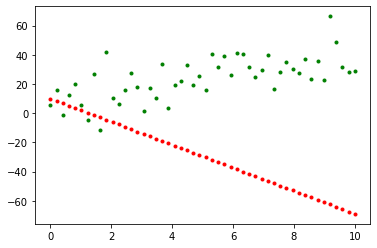

201477.75109776997 -7.894736842105264 10.0


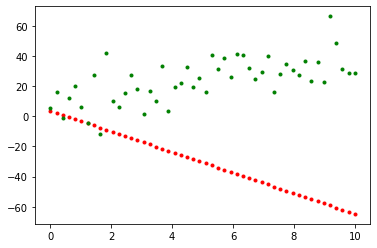

197532.33342004946 -6.842105263157895 3.6842105263157894


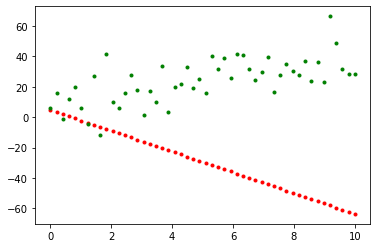

191862.00602294796 -6.842105263157895 4.7368421052631575


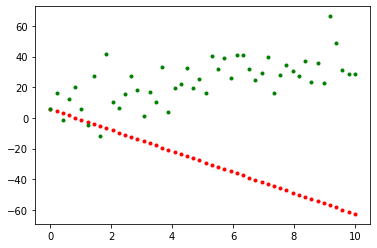

186302.4819499462 -6.842105263157895 5.789473684210526


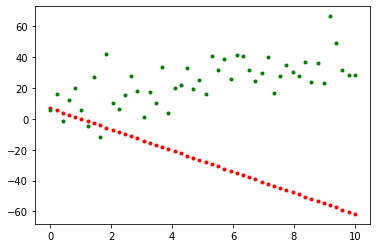

180853.76120104414 -6.842105263157895 6.842105263157894


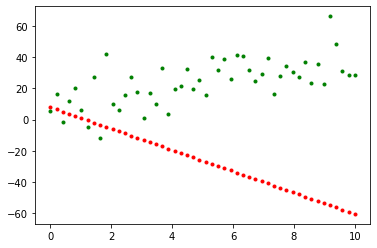

175515.84377624182 -6.842105263157895 7.894736842105264


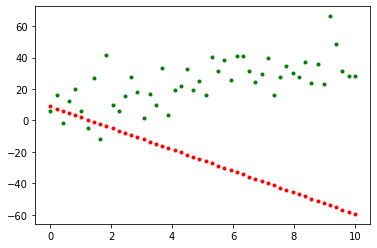

170288.72967553925 -6.842105263157895 8.94736842105263


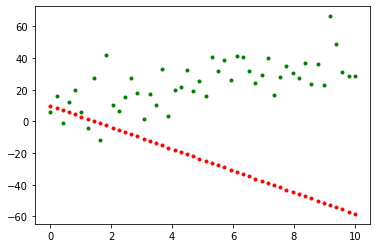

165172.41889893633 -6.842105263157895 10.0


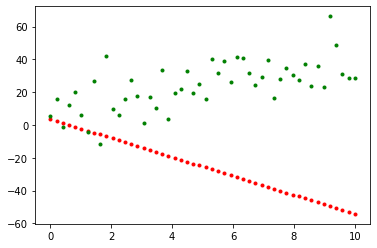

161634.03384035773 -5.7894736842105265 3.6842105263157894


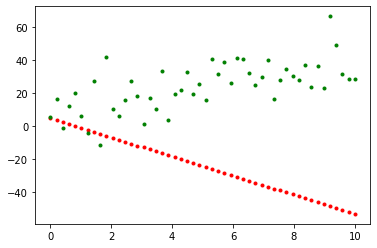

156517.72306375488 -5.7894736842105265 4.7368421052631575


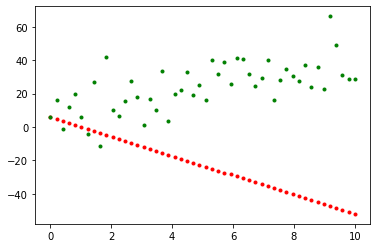

151512.2156112517 -5.7894736842105265 5.789473684210526


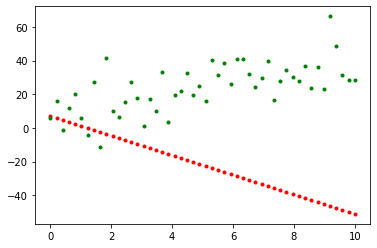

146617.5114828483 -5.7894736842105265 6.842105263157894


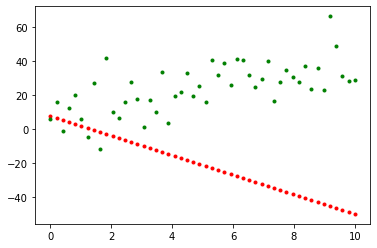

141833.61067854453 -5.7894736842105265 7.894736842105264


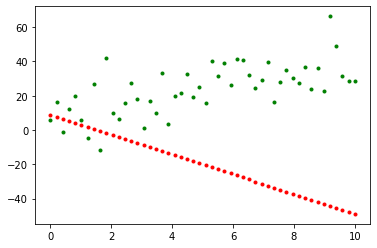

137160.51319834054 -5.7894736842105265 8.94736842105263


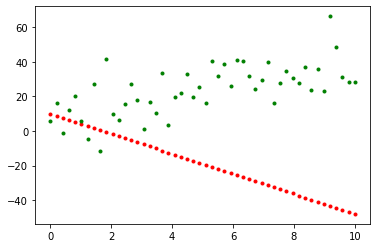

132598.2190422363 -5.7894736842105265 10.0


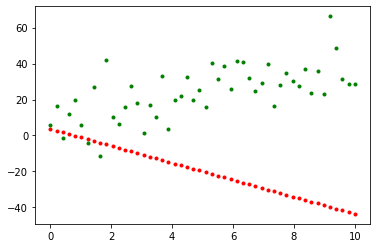

129466.86660279954 -4.736842105263158 3.6842105263157894


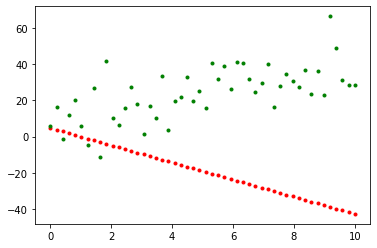

124904.57244669527 -4.736842105263158 4.7368421052631575


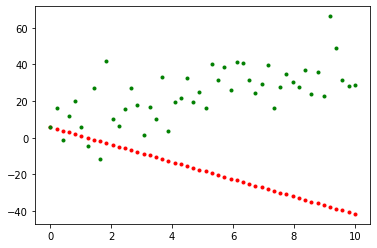

120453.08161469072 -4.736842105263158 5.789473684210526


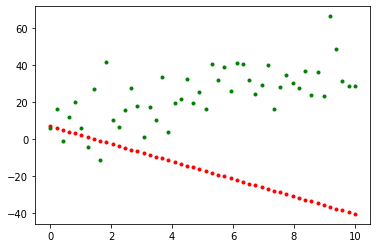

116112.3941067859 -4.736842105263158 6.842105263157894


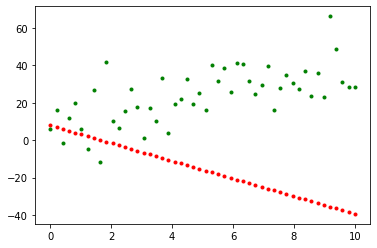

111882.50992298077 -4.736842105263158 7.894736842105264


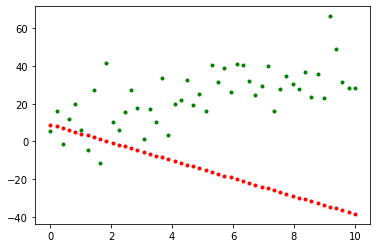

107763.42906327543 -4.736842105263158 8.94736842105263


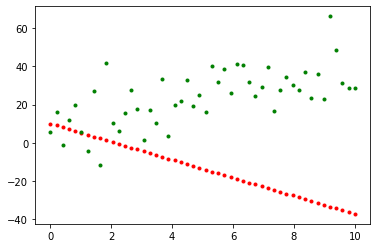

103755.15152766978 -4.736842105263158 10.0


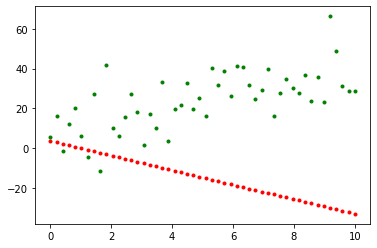

101030.83170737482 -3.6842105263157894 3.6842105263157894


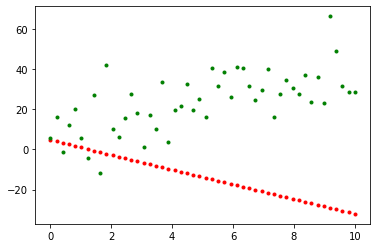

97022.55417176918 -3.6842105263157894 4.7368421052631575


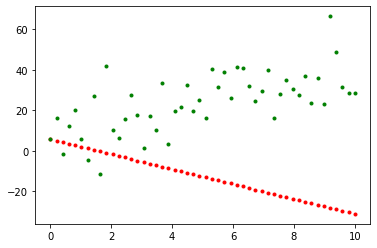

93125.07996026325 -3.6842105263157894 5.789473684210526


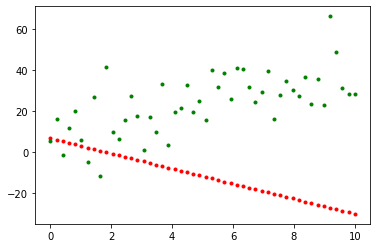

89338.40907285703 -3.6842105263157894 6.842105263157894


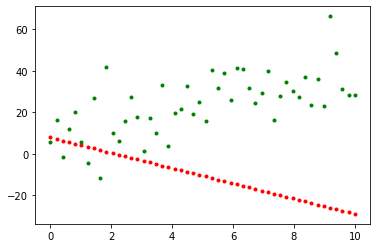

85662.54150955055 -3.6842105263157894 7.894736842105264


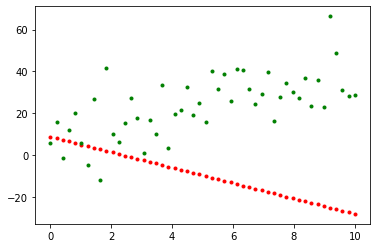

82097.47727034379 -3.6842105263157894 8.94736842105263


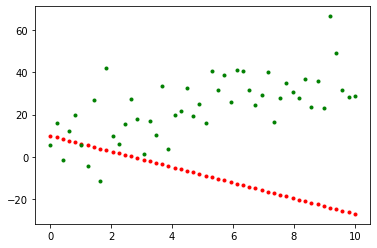

78643.21635523676 -3.6842105263157894 10.0


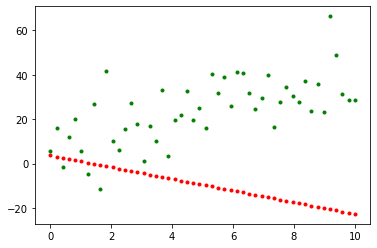

76325.92915408366 -2.6315789473684212 3.6842105263157894


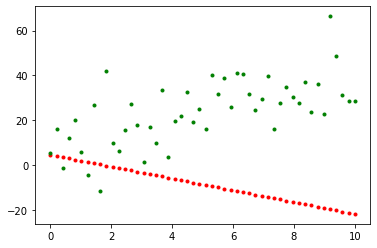

72871.66823897664 -2.6315789473684212 4.7368421052631575


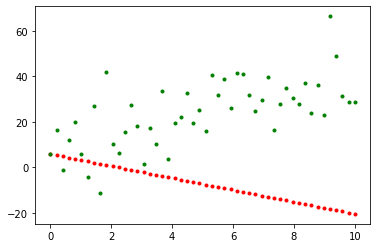

69528.21064796932 -2.6315789473684212 5.789473684210526


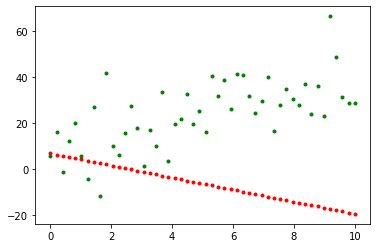

66295.55638106175 -2.6315789473684212 6.842105263157894


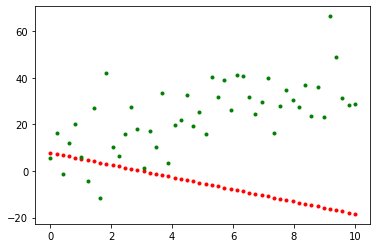

63173.705438253855 -2.6315789473684212 7.894736842105264


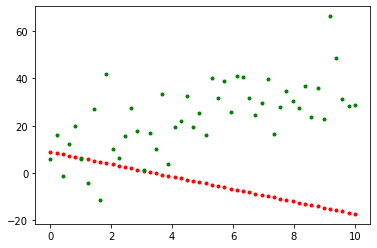

60162.657819545726 -2.6315789473684212 8.94736842105263


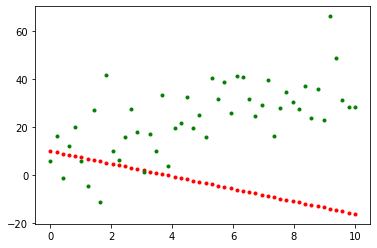

57262.41352493729 -2.6315789473684212 10.0


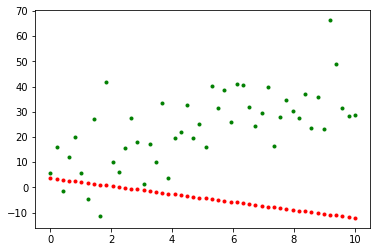

55352.158942926064 -1.578947368421053 3.6842105263157894


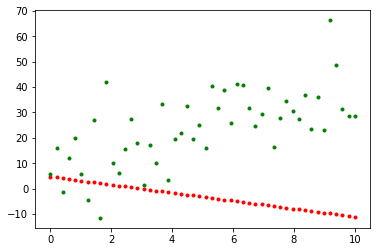

52451.914648317645 -1.578947368421053 4.7368421052631575


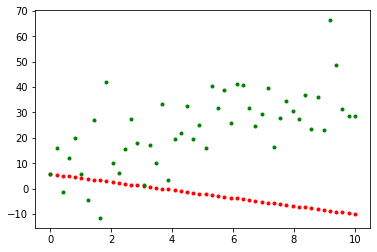

49662.473677808935 -1.578947368421053 5.789473684210526


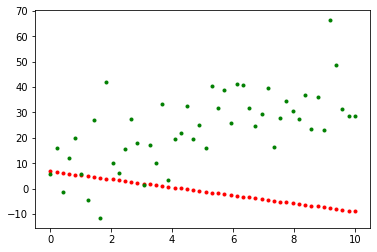

46983.83603139995 -1.578947368421053 6.842105263157894


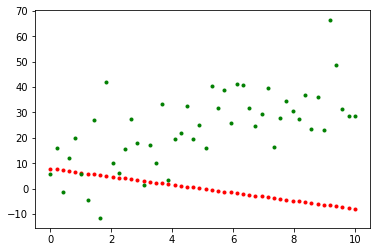

44416.00170909069 -1.578947368421053 7.894736842105264


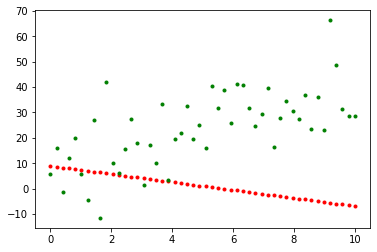

41958.97071088117 -1.578947368421053 8.94736842105263


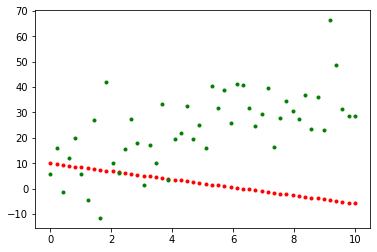

39612.74303677136 -1.578947368421053 10.0


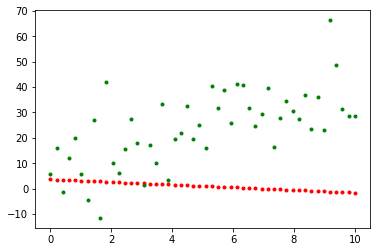

38109.52107390197 -0.526315789473685 3.6842105263157894


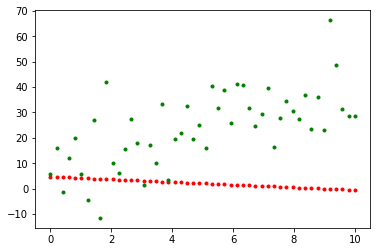

35763.29339979215 -0.526315789473685 4.7368421052631575


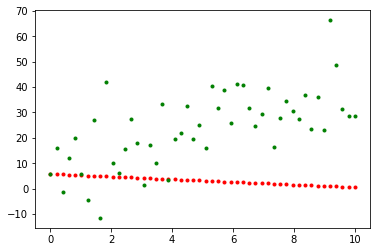

33527.86904978207 -0.526315789473685 5.789473684210526


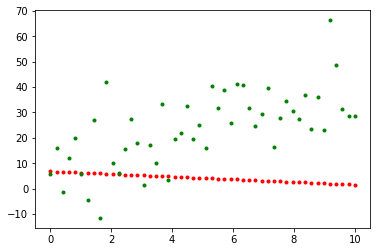

31403.248023871703 -0.526315789473685 6.842105263157894


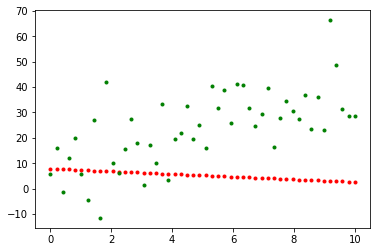

29389.43032206106 -0.526315789473685 7.894736842105264


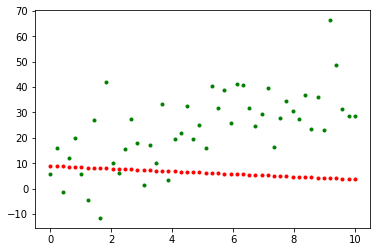

27486.41594435015 -0.526315789473685 8.94736842105263


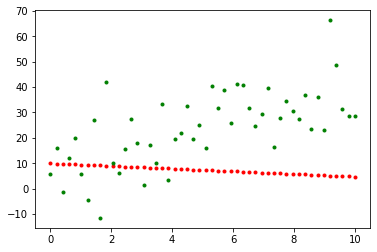

25694.20489073895 -0.526315789473685 10.0


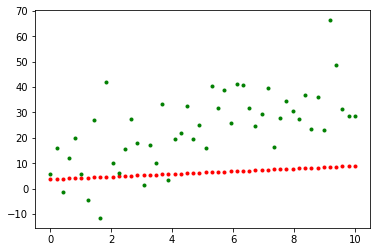

24598.015547011393 0.5263157894736832 3.6842105263157894


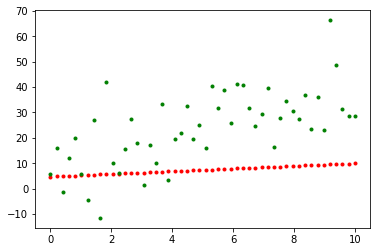

22805.8044934002 0.5263157894736832 4.7368421052631575


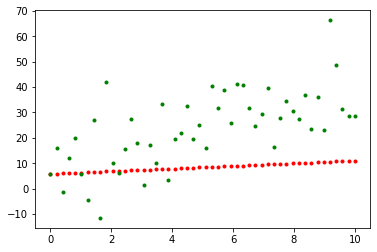

21124.39676388873 0.5263157894736832 5.789473684210526


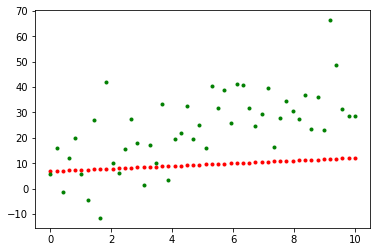

19553.79235847698 0.5263157894736832 6.842105263157894


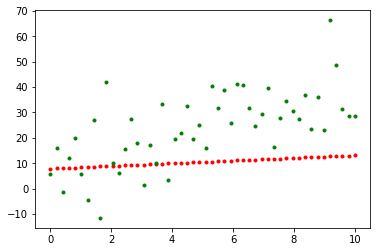

18093.991277164954 0.5263157894736832 7.894736842105264


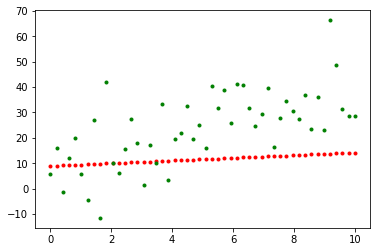

16744.993519952655 0.5263157894736832 8.94736842105263


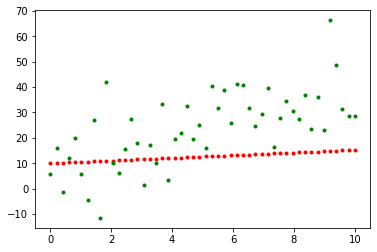

15506.799086840074 0.5263157894736832 10.0


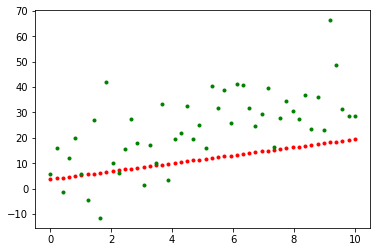

14817.642362254353 1.5789473684210513 3.6842105263157894


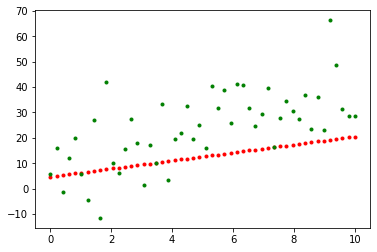

13579.447929141774 1.5789473684210513 4.7368421052631575


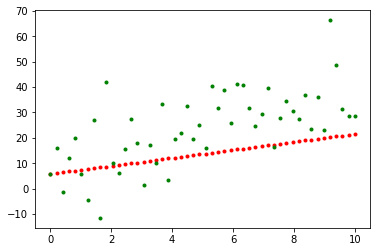

12452.056820128919 1.5789473684210513 5.789473684210526


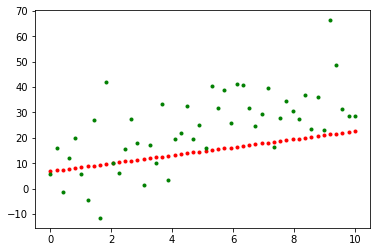

11435.469035215785 1.5789473684210513 6.842105263157894


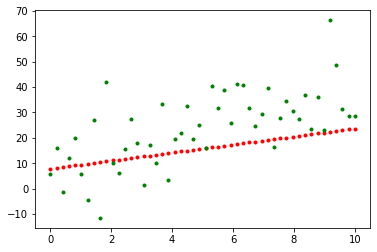

10529.684574402374 1.5789473684210513 7.894736842105264


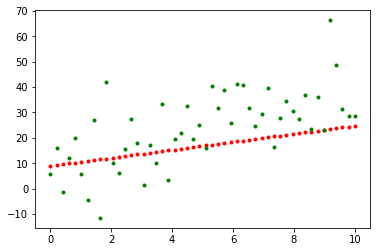

9734.703437688688 1.5789473684210513 8.94736842105263


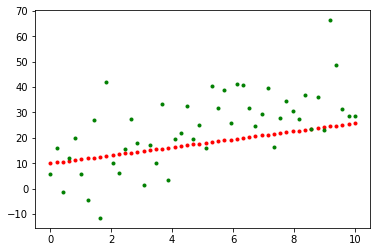

9050.525625074722 1.5789473684210513 10.0


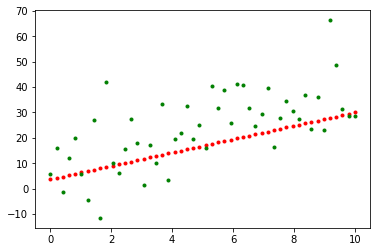

8768.401519630834 2.6315789473684212 3.6842105263157894


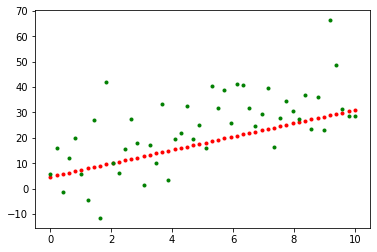

8084.223707016871 2.6315789473684212 4.7368421052631575


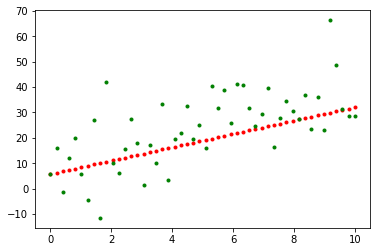

7510.849218502631 2.6315789473684212 5.789473684210526


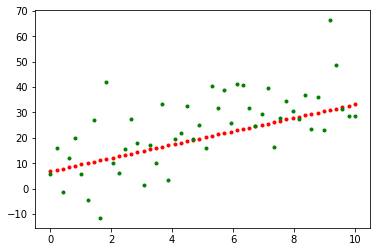

7048.278054088112 2.6315789473684212 6.842105263157894


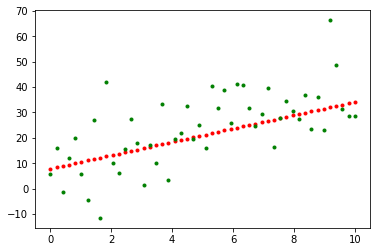

6696.510213773317 2.6315789473684212 7.894736842105264


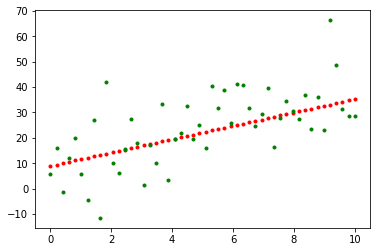

6455.545697558247 2.6315789473684212 8.94736842105263


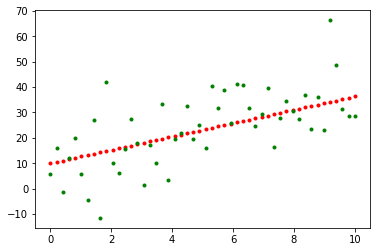

6325.3845054428975 2.6315789473684212 10.0


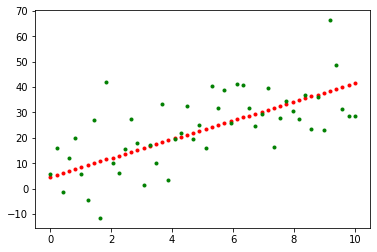

6320.131827025506 3.6842105263157894 4.7368421052631575


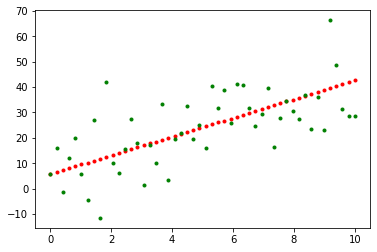

6300.77395900988 3.6842105263157894 5.789473684210526


In [119]:
best_loss = 100000000
best_m = 0
best_b = 0 

for m_guess in np.linspace(-10,10,20):
    for b_guess in np.linspace(-10,10,20):
        
        y_guess = m_guess * x + b_guess #create new y guess

        loss = np.sum((y_guess - y)**2)

        if loss < best_loss:
            
            best_loss = loss
            best_m = m_guess
            best_b = b_guess 

            plt.plot(x,y_guess,'r.');
            plt.plot(x,y,'g.');
            plt.show()

            print(loss,m_guess,b_guess) #print out loss

In [117]:
#gives A BEST GUESS 